## Load the dataset

In [20]:
import tensorflow as tf
import matplotlib.pyplot as plt

mnist = tf.keras.datasets.mnist  # 28x28 images of hand-written digits 0-9

(x_train, y_train), (x_test, y_test) = mnist.load_data()  # unpack the data

## Understanding the Data
* x_train data -  is the "features", pixel values of the 28x28 images of these ditigs 0-9.
* y_train data - is the label (0-9)
* x_test - is the "out of sample" examples that we will use. we'll use them to test the model.

## Normalize the data:

In [21]:
# Normalize the images values between 0-1 instead of 0-255
x_train = tf.keras.utils.normalize(x_train, axis=1)  
x_test = tf.keras.utils.normalize(x_test, axis=1)

## Plot the training data samples:

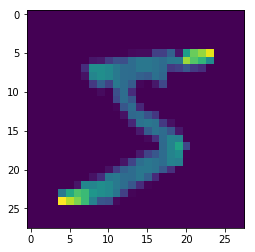

In [22]:
# plot the data
plt.imshow(x_train[0])
plt.show()

## Print the label samples:

In [23]:
print(y_train[0])

5


## Build the Sequential Model
A sequential model is what you're going to use most of the time. It just means things are going to go in direct order. A feed forward model. No going backwards...for now.

In [35]:
model = tf.keras.models.Sequential()

## Flatten the input
Was the input layer flat, or was it multi-dimensional? It was flat. So, we need to take this 28x28 image, and make it a flat 1x784. There are many ways for us to do this, but keras has a Flatten layer built just for us, so we'll use that. 

In [36]:
model.add(tf.keras.layers.Flatten(input_shape=x_train[0].shape))

## Add a Dense Hidden Layer
Next, we want our hidden layers. We're going to go with the simplest neural network layer, which is just a Dense layer. This refers to the fact that it's a densely-connected layer, meaning it's "fully connected," where each node connects to each prior and subsequent node. Just like our image.
This layer has 128 units. The activation function is relu, short for rectified linear. Currently, relu is the activation function you should just default to. 

In [37]:
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))  # add another identical layer

## Add an Output Layer
This is our final layer. It has 10 nodes. 1 node per possible number prediction. In this case, our activation function is a softmax function, since we're really actually looking for something more like a probability distribution of which of the possible prediction options this thing we're passing features through of is. 

In [38]:
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

## Compile the model
Now we need to "compile" the model. This is where we pass the settings for actually optimizing/training the model we've defined.

Next, we have our loss metric. Loss is a calculation of error. A neural network doesn't actually attempt to maximize accuracy. It attempts to minimize loss. Again, there are many choices, but some form of categorical crossentropy is a good start for a classification task like this.

In [39]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

## Train/Fit the model
As we train, the loss goes down for each epoch

In [40]:
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
60000/60000 [==============================] - 6s 107us/step - loss: 0.2605 - acc: 0.9236
Epoch 2/3
60000/60000 [==============================] - 5s 87us/step - loss: 0.1079 - acc: 0.9662
Epoch 3/3
60000/60000 [==============================] - 5s 91us/step - loss: 0.0723 - acc: 0.9770


## Evaluate New Data Samples
Now that's loss and accuracy for in-sample data. Getting a high accuracy and low loss might mean your model learned how to classify digits in general (it generalized)...or it simply memorized every single example you showed it (it overfit). This is why we need to test on out-of-sample data (data we didn't use to train the model).

In [41]:
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss)
print(val_acc)

10000/10000 [==============================] - 1s 64us/step
0.09094593774275854
0.9719


## Save the Trained Model

In [42]:
model.save('epic_num_reader.model')

## Load the Trained Model

In [44]:
new_model = tf.keras.models.load_model('epic_num_reader.model')

## Make Predictions

In [46]:
predictions = new_model.predict(x_test)
print(predictions)

[[3.1849690e-10 4.4097003e-08 1.1142762e-06 ... 9.9999845e-01
  1.5577362e-08 6.3339527e-08]
 [6.0228482e-11 2.5752699e-03 9.9736482e-01 ... 2.3673415e-08
  5.3880757e-07 1.1870818e-12]
 [9.0084043e-08 9.9862564e-01 2.2976865e-05 ... 1.7382255e-04
  1.1671425e-03 1.0060461e-06]
 ...
 [6.6404894e-08 5.2162403e-07 6.3079533e-08 ... 1.2683034e-05
  8.3629425e-07 1.5644007e-03]
 [1.5107048e-08 2.6461255e-08 4.8334481e-10 ... 1.1948219e-08
  2.4858298e-05 1.4929942e-07]
 [1.5650761e-07 9.8829291e-09 1.5808344e-07 ... 3.6443057e-10
  4.7945591e-08 1.2739622e-08]]


In [48]:
import numpy as np
print(np.argmax(predictions[0]))

7


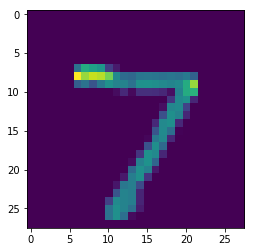

In [50]:
plt.imshow(x_test[0])
plt.show()

## Using Our Own Data

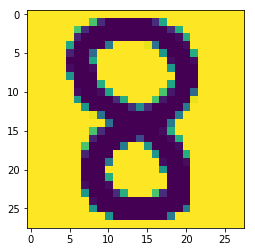

In [126]:
import cv2
img = cv2.imread('digit.png', cv2.IMREAD_GRAYSCALE)

plt.imshow(img)
plt.show()

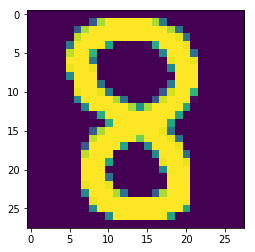

In [127]:
img = cv2.resize(255-img, (28,28))  # resize the image and invert it (black background)
plt.imshow(img)
plt.show()

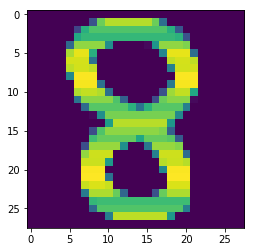

In [128]:
img = tf.keras.utils.normalize(img, axis=1)  # normalize between 0-1
plt.imshow(img)
plt.show()

In [129]:
# replace the first sample with ours and predict it's value
images = np.zeros((1, 28, 28))
images.shape
x_test[0] = img

prediction = new_model.predict(x_test)
print(np.argmax(prediction[0]))

8
